<h1 align='center'><b> BÁO CÁO ĐỒ ÁN MÔN MÁY HỌC </b></h1> </br>
<h2 align='center'><font color='red'> Bài toán: Phân tích cảm xúc của một bình luận (feedback) của khách hàng trên các trang thương mại điện tử</h2>

#**0. Danh sách thành viên**
 
 
1. &nbsp;&nbsp;&nbsp;&nbsp;  Nguyễn Đức Thịnh - 18521442
2. &nbsp;&nbsp;&nbsp;&nbsp;  Huỳnh Minh Tuấn - 18521596
3. &nbsp;&nbsp;&nbsp;&nbsp;  Nguyễn Minh Thông - 18521459

#**1. Mô tả bài toán**

###Nội dung bài toán phân tích cảm xúc của một đánh giá (feedback)
 
 
>&nbsp;&nbsp;&nbsp;&nbsp; Hiện nay nhu cầu mua hàng qua mạng của người dùng ngày càng trở nên phát triển mạnh hơn do những lợi ích mà nó mang lại, như tiện lợi, chi phí rẻ, có nhiều chương trình khuyến mãi hấp dẫn, có thể ngồi ở nhà để xem sản phẩm mà không cần phải đến tận nơi để xem, … Tuy nhiên, việc mua hàng qua mạng cũng có những nhược điểm, trong đó có việc người dùng không thể tận mắt đánh giá sản phẩm của mình như mua trực tiếp tại các cửa hàng được. Vì vậy, các mục bình luận về sản phẩm của những người dùng đã sử dụng qua sản phẩm đóng vai trò quan trọng trong việc đánh giá chất lượng các sản phẩm tương ứng, các bình luận chủ yếu gồm 2 loại: tích cực hoặc tiêu cực. Tuy nhiên, số lượng các bình luận trên các trang thương mại điện tử rất nhiều, gây khó khăn khi đánh giá từng bình luận bằng tay, vì vậy, các thuật toán máy học sẽ hỗ trợ đắc lực cho việc phân loại này.
 
###Mục đích bài toán
 
 
> &nbsp;&nbsp;&nbsp;&nbsp; Đóng góp cho việc phân tích và khai thác ý kiến, nhất là ý kiến của khách hàng dành cho các doanh nghiệp, cửa hàng, dịch vụ,…nhằm đưa ra dữ liệu cho các hệ thống phản hồi tự động, điều này là rất thiết yếu bởi lẽ đa phần cơ sở kinh doanh nào cũng đều có trang web riêng để chạy theo kịp với sự phát triển của nền công nghệ 4.0 như hiện nay.</br>
&nbsp;&nbsp;&nbsp;&nbsp; Dựa vào những ý kiến phản hồi đó mà các doanh nghiệp có thể đưa ra các chiến lược, chính sách cải thiện chất lượng phục vụ và sản phẩm, cũng như cải thiện uy tín, chất lượng của chính doanh nghiệp đó.</br>
###**Input** 
 
 
> Một câu, từ đánh giá (feedback) bất kỳ bằng tiếng Việt
 
###**Ouput**
 
 
> Model dự đoán nhãn cho câu, từ đánh giá (feedback) đó mang ý nghĩa tích cực hay tiêu cực.

#**2. Mô tả bộ dữ liệu**

##**2.1 Cách thức xây dựng:** 

*   Thu thập các đánh giá, nhận xét của khách hàng từ các website thương mại điện tử lớn như: [lazada](https://www.lazada.vn/), [shopee](https://shopee.vn/), [Thế giới di động](https://www.thegioididong.com/), ... 
*   Thu thập dữ liệu dựa trên đặc tính chung của 1 website, các class chứa các element. Vì vậy quá trình crawl diễn ra như sau: 

      * Xác định class chứa comment
      * Dùng đoạn code Javascript sau (sử dụng cửa sổ Inspect Element) để crawl 

      ```
      let listItem = '';
for(item of document.getElementsByClassName("<class name>")){
    listItem = listItem + item.innerText + '\n';
}
      ```
*   Ngoài ra dữ liệu còn được lấy tại VLSP (Vietnamese Language and Speech Processing). </br>

##**2.2 Số lượng:** 


> Gồm 8000 dòng dữ liệu (hơn 50% tự crawl còn lại là của VLSP). Dữ liệu crawl được được gán nhãn bằng tay và merge chung thành bộ dataset hoàn chỉnh. Tham khảo dataset tại [đây](https://github.com/thinh18521442/Course_Project_AI/blob/master/dataset1.csv) 









#**3. Thực hiện bài toán**

##**3.1 Install package và import các thư viện cần thiết.** 



> Joblib: hỗ trợ lưu lại file trọng số của model



In [ ]:
!pip install joblib



> pyvi: hỗ trợ tách từ Tiếng Việt



In [ ]:
!pip install pyvi



> **Import các thư viện**



In [4]:
import pandas as pd
import numpy as np
import re
from gensim.models import KeyedVectors
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import os 
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib 
import seaborn as sn
import operator 
import matplotlib.pyplot as plt 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##**3.2 Load dataset**

In [5]:
df = pd.read_csv('/content/drive/My Drive/Course_Project_ML/dataset1.csv')
df.head(10)

,Text,Label
0,"Mình đã dùng anywhere thế hệ đầu, quả là đầy t...",0
1,"Quan tâm nhất là độ trễ có cao không, dùng thi...",0
2,"dag xài con cùi bắp 98k....pin trâu, mỗi tội đ...",0
3,logitech chắc hàng phải tiền triệu trở lên dùn...,0
4,"Đang xài con m175 cùi mía , nhà xài nhiều chuộ...",0
5,"Đang xài 2 con M185, nút chuột giữa hai con đề...",0
6,Con Anywhere 1 mình dùng bị double click cũng ...,0
7,"Hàng cty cấp, cấp xong vứt ở nhà, xài con Xorn...",0
8,"Magic mouse mà ngon hơn mới lạ, Magic mouse ch...",0
9,"em giống y bác luôn, chán bluetooth kinh hồn, ...",0


##**3.3 Data visulazation and preprocessing**

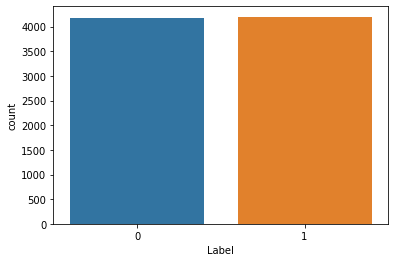

In [ ]:
sn.countplot(df['Label'])



> Dựa vào biểu đồ có thể thấy data cân bằng



**Preprocessing**

>&nbsp;&nbsp;&nbsp;&nbsp; Văn bản đầu vào của chúng ta có thể chứa nhiều ký tự thừa, dấu câu thừa, khoảng trắng thừa, các từ viết tắt, viết hoa, viết sai chính tả... điều này có thể làm ảnh hưởng tới các bước ở sau này nên chúng ta cần phải xử lý nó trước, dữ liệu được tiền xử lý bằng cách loại bỏ các dấu câu, fix lại các từ ngữ người dùng như ok, ko, thnks,... loại bỏ các khoảng trống dư thừa, đưa toàn bộ về chữ thường (lower case), quy đổi một số quy định về dạng ngữ nghĩa.


In [6]:
def standardize_data(row):
    row = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), row, flags=re.IGNORECASE)
    row = row.lower()
    replace_list = {
        'òa': 'oà', 'óa': 'oá', 'ỏa': 'oả', 'õa': 'oã', 'ọa': 'oạ', 'òe': 'oè', 'óe': 'oé','ỏe': 'oẻ',
        'õe': 'oẽ', 'ọe': 'oẹ', 'ùy': 'uỳ', 'úy': 'uý', 'ủy': 'uỷ', 'ũy': 'uỹ','ụy': 'uỵ', 'uả': 'ủa',
        'ả': 'ả', 'ố': 'ố', 'u´': 'ố','ỗ': 'ỗ', 'ồ': 'ồ', 'ổ': 'ổ', 'ấ': 'ấ', 'ẫ': 'ẫ', 'ẩ': 'ẩ',
        'ầ': 'ầ', 'ỏ': 'ỏ', 'ề': 'ề','ễ': 'ễ', 'ắ': 'ắ', 'ủ': 'ủ', 'ế': 'ế', 'ở': 'ở', 'ỉ': 'ỉ',
        'ẻ': 'ẻ', 'àk': u' à ','aˋ': 'à', 'iˋ': 'ì', 'ă´': 'ắ','ử': 'ử', 'e˜': 'ẽ', 'y˜': 'ỹ', 'a´': 'á',
        'ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ',
        'okey': ' ok ', 'ôkê': ' ok ', 'oki': ' ok ', ' oke ':  ' ok ',' okay':' ok ','okê':' ok ',
        ' tks ': u' cám ơn ', 'thks': u' cám ơn ', 'thanks': u' cám ơn ', 'ths': u' cám ơn ', 'thank': u' cám ơn ',
        '⭐': 'star ', '*': 'star ', '🌟': 'star ', '🎉': u' positive ',
        'kg ': u' không ','not': u' không ', u' kg ': u' không ', '"k ': u' không ',' kh ':u' không ','kô':u' không ','hok':u' không ',' kp ': u' không phải ',u' kô ': u' không ', '"ko ': u' không ', u' ko ': u' không ', u' k ': u' không ', 'khong': u' không ', u' hok ': u' không ',
        'he he': ' positive ','hehe': ' positive ','hihi': ' positive ', 'haha': ' positive ', 'hjhj': ' positive ',
        ' lol ': ' negative ',' cc ': ' negative ','cute': u' dễ thương ','huhu': ' negative ', ' vs ': u' với ', 'wa': ' quá ', 'wá': u' quá', 'j': u' gì ', '“': ' ',
        ' sz ': u' cỡ ', 'size': u' cỡ ', u' đx ': u' được ', 'dk': u' được ', 'dc': u' được ', 'đk': u' được ',
        'đc': u' được ','authentic': u' chuẩn chính hãng ',u' aut ': u' chuẩn chính hãng ', u' auth ': u' chuẩn chính hãng ', 'thick': u' positive ', 'store': u' cửa hàng ',
        'shop': u' cửa hàng ', 'sp': u' sản phẩm ', 'gud': u' tốt ','god': u' tốt ','wel done':' tốt ', 'good': u' tốt ', 'gút': u' tốt ',
        'sấu': u' xấu ','gut': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', 'perfect': 'rất tốt', 'bt': u' bình thường ',
        'time': u' thời gian ', 'qá': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ',
        'ể': 'ể', 'product': 'sản phẩm', 'quality': 'chất lượng','chat':' chất ', 'excelent': 'hoàn hảo', 'bad': 'tệ','fresh': ' tươi ','sad': ' tệ ',
        'date': u' hạn sử dụng ', 'hsd': u' hạn sử dụng ','quickly': u' nhanh ', 'quick': u' nhanh ','fast': u' nhanh ','delivery': u' giao hàng ',u' síp ': u' giao hàng ',
        'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',u' order ': u' đặt hàng ',
        'chất lg': u' chất lượng ',u' sd ': u' sử dụng ',u' dt ': u' điện thoại ',u' nt ': u' nhắn tin ',u' tl ': u' trả lời ',u' sài ': u' xài ',u'bjo':u' bao giờ ',
        'thik': u' thích ',u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ',u'quả ng ':u' quảng  ',
        'dep': u' đẹp ',u' xau ': u' xấu ','delicious': u' ngon ', u'hàg': u' hàng ', u'qủa': u' quả ',
        'iu': u' yêu ','fake': u' giả mạo ', 'trl': 'trả lời', '><': u' positive ',
        ' por ': u' tệ ',' poor ': u' tệ ', 'ib':u' nhắn tin ', 'rep':u' trả lời ',u'fback':' feedback ','fedback':' feedback ',
        #dưới 3* quy về 1*, trên 3* quy về 5*
        '6 sao': ' 5star ','6 star': ' 5star ', '5star': ' 5star ','5 sao': ' 5star ','5sao': ' 5star ',
        'starstarstarstarstar': ' 5star ', '1 sao': ' 1star ', '1sao': ' 1star ','2 sao':' 1star ','2sao':' 1star ',
        '2 starstar':' 1star ','1star': ' 1star ', '0 sao': ' 1star ', '0star': ' 1star ',
    }
    for k ,v in replace_list.items():
      row = row.replace(k,v)
    row = row.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ") \
        .replace("-", " ").replace("?", " ")      
    row = row.strip()
    return row

**Số lượng từ trong mỗi câu**

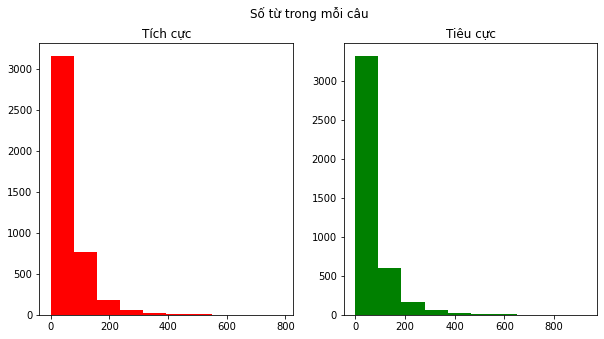

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df[df['Label']==1]['Text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='red')
ax1.set_title('Tích cực')

text_len=df[df['Label']==0]['Text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Tiêu cực')
fig.suptitle('Số từ trong mỗi câu')
plt.show()



> Phần lớn các câu trong data chứa ít hơn 100 từ. Một số câu còn lại khá dài từ 100 đến 200 từ (đánh giá sơ bộ số từ trong câu bằng cách tách theo khoảng trắng, sẽ không chính xác cho đến khi bước tách từ thực sự được thực hiện).



##**3.4 Word Embedding**

**Word Embedding là gì?**

>&nbsp;&nbsp;&nbsp;&nbsp; Word Embedding làm một phương pháp biểu diễn một từ cụ thể ở dạng vector. Có 2 phương pháp word embedding là: dựa vào tần số xuất hiện của từ để tạo ra các vector từ (TF-IPF, Count Vector, Co-occurrence Matrix,...), xây dựng các vector từ các mô hình dự đoán(Word2Vec,...). 



**Sử dụng cho bài toán này**



> Sử dụng model word2vec Tiếng Việt đã được train sẵn của tác giả Vũ Xuân Sơn, link tải model tại [đây](https://github.com/sonvx/word2vecVN).

> Mô tả đôi nét về model: dữ liệu train được lấy từ trang báo lớn ở Việt Nam (Baomoi.vn), gồm 439056 từ shape(400,)







**Load model word2vec**

> Sử dụng thư viện gensim để load model



In [7]:
from gensim.test.utils import datapath
wv_from_bin = KeyedVectors.load_word2vec_format(datapath("/content/drive/My Drive/Course_Project_ML/baomoi.model.bin"), binary=True)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [8]:
vocab = wv_from_bin.wv.vocab

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [ ]:
len(vocab)

439056

**Tách từ**

> Câu trước khi word embedding cần được tách ra thành từng từ. Sử dụng thư viện Pyvi hổ trợ tách từ Tiếng Việt 



In [9]:
from pyvi import ViTokenizer

In [10]:
def tok(row):
  return ViTokenizer.tokenize(row)

**Word embedding**

> Model Word2vec vector hóa mỗi từ thành một vector với dim = 400. Phương pháp của nhóm mình đó chính là lấy các từ trong câu sau khi đã thực hiện tách từ, sau đó dùng mô hình Word2Vec đã được training cho tiếng Việt, chuyển đổi các từ đó sang các vector số thực có chiều dài cố định. Cuối cùng, vector của 1 câu mà nhóm mình chuyển đổi sang sẽ là **<font color='red'>TỔNG</font>** của các vector đại diện cho các từ trong câu đó!





> Hàm embedding nhận đầu vào là một text thực hiện tính tổng các vector từ sau đó reshape vector đó về dạng (1,400) rồi đưa vào list global X.   



In [11]:
X = []
def embedding(row):
  # words_train = X_train.str.split(" ")
  # words_test = X_test.str.split(" ")
  # X_train_train = np.zeros((400))
  # for word_train in words_train:
  #   if word_train in vocab:
  #       X_train_train += w2v.wv[word_train]
  # X_test_test = np.zeros((400))
  # for word_test in words_test:
  #   if word_test in vocab:
  #       X_test_test += w2v.wv[word_test]
  # return X_train_train, X_test_test
  words = row.split(' ')
  vec_row = np.zeros((400))
  for word in words:
    if word in vocab:
      vec_row += wv_from_bin.wv[word]
  vec_row.reshape(1,-1)
  l = vec_row.tolist()    
  X.append(l)
  

In [12]:
df['Text'] = df.Text.apply(standardize_data)

In [13]:
df['Text'] = df.Text.apply(tok)

In [14]:
df['Text'] = df.Text.apply(embedding)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).




> Sau khi tiến hành thực hiện các hàm trên với bộ dataset ta thu được một list X là các vector đại diện cho bộ dataset của chúng ta.

> Nhưng model nhận vào là một numpy array (n_samples, m_features) nên một lần nữa ta chuyển list X sang dạng np.array. Khá cồng kềnh. 


In [15]:
X = np.array(X)
X.shape

(8379, 400)

##**3.5 Phân chia dữ liệu**


> Dữ liệu được chia thành 2 phần train và test với test_size = 20%.



In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, df['Label'], test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape

(6703, 400)

In [ ]:
Y_train.shape

(6703,)

##**3.6 Xây dựng model, cài đặt**

> Chọn model Support Vector Machine. Tiến hành train sơ bộ trên bộ data cho ra base model.

In [ ]:
model = SVC(kernel='linear', C=1)
model.fit(X_train, Y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

> Model train mất gần 3h nên để tiện việc sử dụng lần sau ta lưu lại file trọng số của model sau khi train

In [ ]:
joblib.dump(model, 'saved_model.pkl')

['saved_model.pkl']

> Accuracy của model trên tập train là 87%

In [ ]:
score = model.score(X_train, Y_train)
print(score)

0.8685663135909294


> Accuracy của model trên tập test là 82%

In [ ]:
score = model.score(X_test, Y_test)
print(score)

0.8210023866348448


**Thử train trên các mô hình phân lớp khác**

**Logistic Regression**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
print("- The accuracy of model on training set: {}".format(logistic_model.score(X_train, Y_train)))
y_pred = logistic_model.predict(X_test)
print("- The accuary of model on test set: {}".format(accuracy_score(y_true=Y_test, y_pred=y_pred)))
print("- The classification report: \n{}".format(classification_report(y_true=Y_test, y_pred=y_pred)))

- The accuracy of model on training set: 0.8624496494107117
- The accuary of model on test set: 0.8239856801909308
- The classification report: 
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       837
           1       0.81      0.84      0.83       839

    accuracy                           0.82      1676
   macro avg       0.82      0.82      0.82      1676
weighted avg       0.82      0.82      0.82      1676



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
# Lưu lại model
joblib.dump(logistic_model, 'logistic_model.pkl')

['logistic_model.pkl']

**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomForest_model = RandomForestClassifier(random_state=0)
randomForest_model.fit(X_train, Y_train)
print("- The accuracy of model on training set: {}".format(randomForest_model.score(X_train, Y_train)))
y_pred = randomForest_model.predict(X_test)
print("- The accuary of model on test set: {}".format(accuracy_score(y_true=Y_test, y_pred=y_pred)))
print("- The classification report: \n{}".format(classification_report(y_true=Y_test, y_pred=y_pred)))

- The accuracy of model on training set: 0.9995524392063255
- The accuary of model on test set: 0.8156324582338902
- The classification report: 
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       837
           1       0.82      0.81      0.81       839

    accuracy                           0.82      1676
   macro avg       0.82      0.82      0.82      1676
weighted avg       0.82      0.82      0.82      1676



In [ ]:
# Lưu lại model
joblib.dump(randomForest_model, 'randomForest_model.pkl')

['randomForest_model.pkl']

**Decision Tree**

In [ ]:
from sklearn import tree
decision_model = tree.DecisionTreeClassifier()
decision_model.fit(X_train, Y_train)
print("- The accuracy of model on training set: {}".format(decision_model.score(X_train, Y_train)))
y_pred = decision_model.predict(X_test)
print("- The accuary of model on test set: {}".format(accuracy_score(y_true=Y_test, y_pred=y_pred)))
print("- The classification report: \n{}".format(classification_report(y_true=Y_test, y_pred=y_pred)))

- The accuracy of model on training set: 0.9995524392063255
- The accuary of model on test set: 0.7106205250596659
- The classification report: 
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       837
           1       0.70      0.75      0.72       839

    accuracy                           0.71      1676
   macro avg       0.71      0.71      0.71      1676
weighted avg       0.71      0.71      0.71      1676



In [ ]:
# Lưu lại model
joblib.dump(decision_model, 'decision_model.pkl')

['decision_model.pkl']

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()
bayes_model.fit(X_train, Y_train)
print("- The accuracy of model on training set: {}".format(bayes_model.score(X_train, Y_train)))
y_pred = decision_model.predict(X_test)
print("- The accuary of model on test set: {}".format(accuracy_score(y_true=Y_test, y_pred=y_pred)))
print("- The classification report: \n{}".format(classification_report(y_true=Y_test, y_pred=y_pred)))

- The accuracy of model on training set: 0.5500522154259286
- The accuary of model on test set: 0.7106205250596659
- The classification report: 
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       837
           1       0.70      0.75      0.72       839

    accuracy                           0.71      1676
   macro avg       0.71      0.71      0.71      1676
weighted avg       0.71      0.71      0.71      1676



In [ ]:
# Lưu lại model
joblib.dump(bayes_model, 'bayes_model.pkl')

['bayes_model.pkl']



> Sau khi thử các mô hình phân lớp khác nhau, nhận thấy rằng SVM là mô hình cho kết quả ổn định nhất nên sẽ được dùng làm model chính thức



##**3.7 Tinh chỉnh tham số**
> Sử dụng GridsearchCV để lựa chọn các hyperparameter cho model SVC(gamma, C, ...)  

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
 
grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.502, total=  24.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.502, total=  24.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   49.5s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.501, total=  24.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.501, total=  24.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.501, total=  24.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.502, total=  24.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.502, total=  24.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.501, total=  24.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.501, total=  24.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 52.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
print('Parameter tốt nhất sau khi turning: ', grid.best_params_)  
print('Trạng thái của model: ' ,grid.best_estimator_) 


Parameter tốt nhất sau khi turning:  {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
Trạng thái của model:  SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


> Lưu lại file trọng số của model 

In [ ]:
joblib.dump(grid, 'grid_saved_model.pkl')

['grid_saved_model.pkl']

> Accuracy của model sau khi fine turning trên tập train là 99,82%

In [ ]:
score1 = grid.score(X_train, Y_train)
print(score1)

0.9982097568253021


> Accuracy của model sau khi fine turning trên tập test là 76.8%

In [ ]:
score1 = grid.score(X_test, Y_test)
print(score1)

0.7678997613365155


##**3.8 Đánh giá model**

In [18]:
# Run câu lệnh này để load lại model đã train trước đó. Chỉ run khi mở một phiên làm việc mới trên colab. 
with open('/content/drive/My Drive/Course_Project_ML/saved_model.pkl', 'rb') as f:
  model = joblib.load(f)

**Trước khi fine turning**

Accuracy score of model:  0.8210023866348448
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       837
           1       0.81      0.84      0.82       839

    accuracy                           0.82      1676
   macro avg       0.82      0.82      0.82      1676
weighted avg       0.82      0.82      0.82      1676

[[671 166]
 [134 705]]


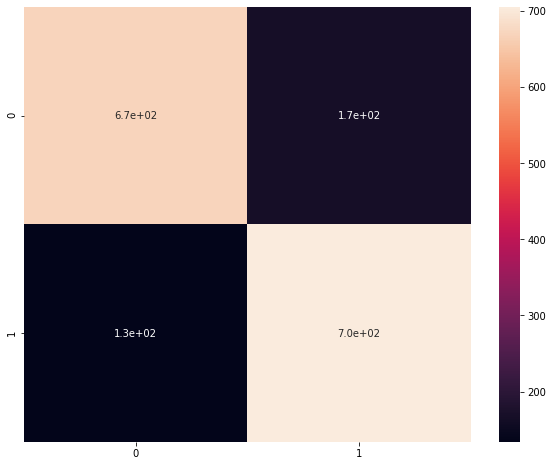

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sn
pre = model.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(Y_test, pre), index = [i for i in [0, 1]],
                  columns = [i for i in [0,1]])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)
print("Accuracy score of model: ",accuracy_score(Y_test, pre))
print(classification_report(Y_test, pre))
print(confusion_matrix(Y_test, pre))

**Sau khi fine turning**

In [ ]:
# Run câu lệnh này để load lại model đã train trước đó. Chỉ run khi mở một phiên làm việc mới trên colab. 
with open('/content/drive/My Drive/Course_Project_ML/grid/grid_saved_model.pkl', 'rb') as f1:
  grid = joblib.load(f1)

Accuracy score of model:  0.7678997613365155
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       837
           1       0.88      0.62      0.73       839

    accuracy                           0.77      1676
   macro avg       0.79      0.77      0.76      1676
weighted avg       0.79      0.77      0.76      1676



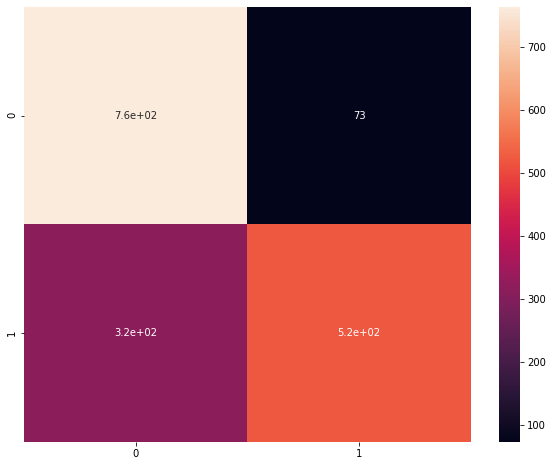

In [ ]:
from sklearn.metrics import confusion_matrix
pre1 = grid.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(Y_test, pre1), index = [i for i in [0, 1]],
                  columns = [i for i in [0,1]])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)
print("Accuracy score of model: ",accuracy_score(Y_test, pre1))
print(classification_report(Y_test, pre1))

#**4. Dự đoán cho 1 câu mới được nhập vào**

> Để tiến hành dự đoán cho một câu feedback mới ta cần thực hiện các bước sau: 


1.   Nhập câu cần dự đoán 
2.   Tiến hành các bước tiền xử lý tương tự như trên.
3.   Load model của chúng ta.
4.   Tiến hành dự đoán và nhận kết quả.



In [ ]:
def predict(text):
  data = text
        
  data = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), data, flags=re.IGNORECASE)
  data = data.lower()
  replace_list = {
      'òa': 'oà', 'óa': 'oá', 'ỏa': 'oả', 'õa': 'oã', 'ọa': 'oạ', 'òe': 'oè', 'óe': 'oé','ỏe': 'oẻ',
      'õe': 'oẽ', 'ọe': 'oẹ', 'ùy': 'uỳ', 'úy': 'uý', 'ủy': 'uỷ', 'ũy': 'uỹ','ụy': 'uỵ', 'uả': 'ủa',
      'ả': 'ả', 'ố': 'ố', 'u´': 'ố','ỗ': 'ỗ', 'ồ': 'ồ', 'ổ': 'ổ', 'ấ': 'ấ', 'ẫ': 'ẫ', 'ẩ': 'ẩ',
      'ầ': 'ầ', 'ỏ': 'ỏ', 'ề': 'ề','ễ': 'ễ', 'ắ': 'ắ', 'ủ': 'ủ', 'ế': 'ế', 'ở': 'ở', 'ỉ': 'ỉ',
      'ẻ': 'ẻ', 'àk': u' à ','aˋ': 'à', 'iˋ': 'ì', 'ă´': 'ắ','ử': 'ử', 'e˜': 'ẽ', 'y˜': 'ỹ', 'a´': 'á',
      'ô kêi': ' ok ', 'okie': ' ok ', ' o kê ': ' ok ', ':)' : 'positive', ':(' : 'negative',
      'okey': ' ok ', 'ôkê': ' ok ', 'oki': ' ok ', ' oke ':  ' ok ',' okay':' ok ','okê':' ok ',
      ' tks ': u' cám ơn ', 'thks': u' cám ơn ', 'thanks': u' cám ơn ', 'ths': u' cám ơn ', 'thank': u' cám ơn ',
      '⭐': 'star ', '*': 'star ', '🌟': 'star ', '🎉': u' positive ',
      'kg ': u' không ','not': u' không ', u' kg ': u' không ', '"k ': u' không ',' kh ':u' không ','kô':u' không ','hok':u' không ',' kp ': u' không phải ',u' kô ': u' không ', '"ko ': u' không ', u' ko ': u' không ', u' k ': u' không ', 'khong': u' không ', u' hok ': u' không ',
      'he he': ' positive ','hehe': ' positive ','hihi': ' positive ', 'haha': ' positive ', 'hjhj': ' positive ',
      ' lol ': ' negative ',' cc ': ' negative ','cute': u' dễ thương ','huhu': ' negative ', ' vs ': u' với ', 'wa': ' quá ', 'wá': u' quá', 'j': u' gì ', '“': ' ',
      ' sz ': u' cỡ ', 'size': u' cỡ ', u' đx ': u' được ', 'dk': u' được ', 'dc': u' được ', 'đk': u' được ',
      'đc': u' được ','authentic': u' chuẩn chính hãng ',u' aut ': u' chuẩn chính hãng ', u' auth ': u' chuẩn chính hãng ', 'thick': u' positive ', 'store': u' cửa hàng ',
      'shop': u' cửa hàng ', 'sp': u' sản phẩm ', 'gud': u' tốt ','god': u' tốt ','wel done':' tốt ', 'good': u' tốt ', 'gút': u' tốt ',
      'sấu': u' xấu ','gut': u' tốt ', u' tot ': u' tốt ', u' nice ': u' tốt ', 'perfect': 'rất tốt', 'bt': u' bình thường ',
      'time': u' thời gian ', 'qá': u' quá ', u' ship ': u' giao hàng ', u' m ': u' mình ', u' mik ': u' mình ',
      'ể': 'ể', 'product': 'sản phẩm', 'quality': 'chất lượng','chat':' chất ', 'excelent': 'hoàn hảo', 'bad': 'tệ','fresh': ' tươi ','sad': ' tệ ',
      'date': u' hạn sử dụng ', 'hsd': u' hạn sử dụng ','quickly': u' nhanh ', 'quick': u' nhanh ','fast': u' nhanh ','delivery': u' giao hàng ',u' síp ': u' giao hàng ',
      'beautiful': u' đẹp tuyệt vời ', u' tl ': u' trả lời ', u' r ': u' rồi ', u' shopE ': u' cửa hàng ',u' order ': u' đặt hàng ',
      'chất lg': u' chất lượng ',u' sd ': u' sử dụng ',u' dt ': u' điện thoại ',u' nt ': u' nhắn tin ',u' tl ': u' trả lời ',u' sài ': u' xài ',u'bjo':u' bao giờ ',
      'thik': u' thích ',u' sop ': u' cửa hàng ', ' fb ': ' facebook ', ' face ': ' facebook ', ' very ': u' rất ',u'quả ng ':u' quảng  ',
      'dep': u' đẹp ',u' xau ': u' xấu ','delicious': u' ngon ', u'hàg': u' hàng ', u'qủa': u' quả ',
      'iu': u' yêu ','fake': u' giả mạo ', 'trl': 'trả lời', '><': u' positive ', 
      ' por ': u' tệ ',' poor ': u' tệ ', 'ib':u' nhắn tin ', 'rep':u' trả lời ',u'fback':' feedback ','fedback':' feedback ',
      #dưới 3* quy về 1*, trên 3* quy về 5*
      '6 sao': ' 5star ','6 star': ' 5star ', '5star': ' 5star ','5 sao': ' 5star ','5sao': ' 5star ',
      'starstarstarstarstar': ' 5star ', '1 sao': ' 1star ', '1sao': ' 1star ','2 sao':' 1star ','2sao':' 1star ',
      '2 starstar':' 1star ','1star': ' 1star ', '0 sao': ' 1star ', '0star': ' 1star '
  }
  for k ,v in replace_list.items():
    data = data.replace(k,v)
  data = data.replace(",", " ").replace(".", " ") \
      .replace(";", " ").replace("“", " ") \
      .replace(":", " ").replace("”", " ") \
      .replace('"', " ").replace("'", " ") \
      .replace("!", " ").replace("?", " ") \
      .replace("-", " ").replace("?", " ")      
  data = data.strip()

  data = ViTokenizer.tokenize(data)
  T = []
  words = data.split(' ')
  vec_data = np.zeros((400))
  for word in words:
    if word in vocab:
      vec_data += wv_from_bin.wv[word]
  vec_data.reshape(1,-1)
  l = vec_data.tolist()    
  T.append(l)
  T = np.array(T)
  with open('/content/drive/My Drive/Course_Project_ML/saved_model.pkl', 'rb') as f:
    model = joblib.load(f)
  prediction = model.predict(T)
  return int(prediction[0])

In [ ]:
text = input("Input a text to predict: ")
if predict(text):
  print("Tích cực")
else:  
  print("Tiêu cực")

Input a text to predict: Điện Thoại dùng tốt! So với giá ngoài các cửa hàng điện thoại rẻ hơn được 1 triệu! Mua cho Bố dùng rất là thích. Mấy nữa mình sẽ mua thêm 1 cái Tặng mẹ ck
Tích cực


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


#**5. Tham khảo**

1.   Thư viện machine learning sklearn https://scikit-learn.org/

2.   Đánh giá ý kiến khách hàng lazada miai group https://www.miai.vn/2020/05/04/nlp-series-1-thu-lam-he-thong-danh-gia-san-pham-lazada/

3.   Xử lý ngôn ngữ tự nhiên wikipedia https://vi.wikipedia.org/wiki/X%E1%BB%AD_l%C3%BD_ng%C3%B4n_ng%E1%BB%AF_t%E1%BB%B1_nhi%C3%AAn
https://en.wikipedia.org/wiki/Natural_language_processing


